# **Feature engineering: extraction**

As mentioned in the [feature selection notebook](https://github.com/leobezerra/scikit-zero/blob/master/en/notebooks/Feature_selection.ipynb), the Feature engineering pipeline also includes feature extraction. Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features).

Feature Extraction techniques can lead advantages such as:
- Accuracy improvements.
- Overfitting risk reduction.
- Speed up in training.
- Improved Data Visualization.
- Increase in explainability of our model.

In this notebook we are going to use pandas and sckit-learn (sklearn), which is used for data mining and analysis. The dataset we use for all examples of algorithms will be the popular iris dataset


In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Verifying uploaded data:

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can see that the iris dataset has 4 features. When extracting features we ended up reducing the dimensionality of the data. In other words, the number of features. There are some algorithms for this purpose, the ones we will cover are:


*   ***Principal component analysis (PCA)***
*   ***Linear discriminant analysis (LDA)***
*   ***Independent component analysis (ICA)***
*   ***t-Distributed Stochastic Neighbor Embedding (t-SNE)***
 
















## **PCA** 

> An unsupervised linear dimensionality reduction technique that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of linearly uncorrelated variable values called principal components. The number of main components is always less than or equal to the number of original variables. The PCA is associated with a technique for reducing the mass of data, with the least possible loss of information, grouping them in an order according to their variation, that is, according to their behavior within the population. In this way, it allows to summarize and visualize the information in a data set containing the information by multiple correlated quantitative variables, extracting important information from a data table, making it easier to work, since smaller sets are easier to explore by providing faster the algorithm to be implemented.




In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
componentes = pca.fit_transform(x)



PCAdf = pd.DataFrame(data = componentes
             , columns = ['componente 1', 'componente 2','componente 3'])

PCAdf.head()

,componente 1,componente 2,componente 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


Joining the two components with the target:

In [4]:
finaldf = pd.concat([PCAdf, df[['target']]], axis = 1)

finaldf.head()

,componente 1,componente 2,componente 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa


We can see that we reduced the number of features in the dataset to just 2 components, they together contain 95.8% of the initial information.

It shows the value of the variation of each main component relative to the original data


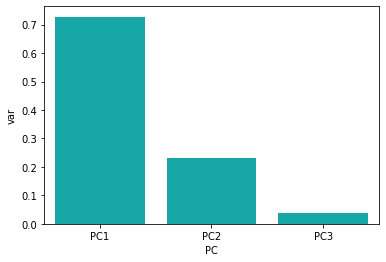

In [5]:
import seaborn as sns

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

## ***LDA***

> It is also a method of reducing dimensionality that uses information from the categories (SUPERVISED) associated with each pattern to linearly extract the most discriminating characteristics. LDA is most commonly used as a dimensionality reduction technique in the pre-processing step for classifying patterns and machine learning applications. The objective is to design a data set in a space of a smaller dimension with good class separability, in order to avoid overfitting and also reduce computational costs. With this approach, the similarity between the LDA and the PCA is perceived, but besides finding the axes of components that maximize the variation of the data, it is also necessary to find the axes that maximize the separation between various classes, it helps to avoid overfitting by minimizing the error in parameter estimation.


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lda = LDA(n_components=2)

X_test

array([[-5.25060772e-02, -5.87763531e-01,  7.62758643e-01,
         1.57942861e+00],
       [ 1.89829664e-01, -1.97618132e+00,  1.37235899e-01,
        -2.61192967e-01],
       [-4.16009689e-01,  2.65187798e+00, -1.34127240e+00,
        -1.31297673e+00],
       [ 1.76501198e+00, -3.56360566e-01,  1.44514709e+00,
         7.90590793e-01],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [ 5.53333275e-01,  5.69251294e-01,  1.27454998e+00,
         1.71090158e+00],
       [-1.02184904e+00,  1.03205722e+00, -1.39813811e+00,
        -1.18150376e+00],
       [ 1.03800476e+00,  1.06445364e-01,  5.35295827e-01,
         3.96171883e-01],
       [ 1.15917263e+00, -5.87763531e-01,  5.92161531e-01,
         2.64698913e-01],
       [ 3.10997534e-01, -5.87763531e-01,  1.37235899e-01,
         1.33225943e-01],
       [ 3.10997534e-01, -1.05056946e+00,  1.04708716e+00,
         2.64698913e-01],
       [ 6.74501145e-01,  3.37848329e-01,  4.21564419e-01,
      

Reducing to 2 features:

In [7]:
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

X_test

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-6.57373148,  1.33053159],
       [-0.78963671, -2.46571777],
       [ 9.50092478,  1.94200901],
       [-6.01851648, -0.97080763],
       [ 7.70249962,  0.04247026],
       [-7.75089197,  1.7094983 ],
       [ 8.02240263,  0.77692631],
       [-1.86519373,  0.20624286],
       [-2.11243194, -0.73009025],
       [-0.71861157, -0.39115625],
       [-4.94879712, -2.47121818],
       [-1.58372213,  0.48919318],
       [-2.06217315, -1.56029699],
       [-2.23503629, -0.34097707],
       [-2.47718063, -0.77994712],
       [ 7.47856328, -0.87305862],
       [-2.3921455 , -0.28683294],
       [-2.25436383, -1.87656708],
       [ 6.92858111, -0.3985868 ],
       [ 8.68884633,  2.03779807],
       [-5.22737702,  0.29412406],
       [-2.67637631, -0.30549354],
       [ 6.57109478, -0.56075158],
       [ 6.65528183, -1.0914344 ],
       [-3.82746162,  0.13992375],
       [ 8.70402366,  0.83717712],
       [ 6.86069093,  0.94362392],
       [-1.17656771, -0.52423001],
       [-0.08019656,

## ***ICA***

> A dimensionality reduction algorithm that transforms a set of variables ​​in a new set of components. It does this so that the statistical independence between the new components is maximized. This is similar to (PCA), which maps a collection of variables ​​for statistically unrelated components, except that the ICA goes a step further by maximizing statistical independence rather than just developing uncorrelated components. If we talk about an image, it means that you will find the curves and borders within an image. For example, in facial recognition, the ICA will identify the eyes, nose, mouth, etc. as independent components.

In [ ]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=2,random_state=0)
x = transformer.fit_transform(x)
x

## ***t-SNE***

> The objective of t-SNE is from a set of points in a multi-dimensional space to find a faithful representation of these points in a space of smaller dimension, usually a 2D plane. The algorithm is non-linear and adapts to the data, performing different transformations in different regions of multi-dimensional space. 
PCA is similar to t-SNE, however PCA is a linear dimension reduction technique that aims to maximize variance and preserve large distances between pairs, on the other hand t-SNE preserves only small distances between pairs or local similarities. t-SNE calculates a measure of similarity between pairs of instances in the upper dimensional space and the lower dimensional space. He then tries to optimize these two similarity measures using a cost function.

In [ ]:
from sklearn.manifold import TSNE
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

tsne = TSNE(n_components=2, n_iter=1000, random_state=40)
points = tsne.fit_transform(df[features])

points

Now that we have the two resulting dimensions we can visualise them by creating a scatter plot of the two dimensions and coloring each sample by its respective **label**.

In [ ]:
import matplotlib.pyplot as plt 

df['tsne-2d-one'] = points[:,0]
df['tsne-2d-two'] = points[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    data=df,
    legend="full",
    alpha=0.3
)

We can see that the **label** are very clearly clustered in their own sub groups. If we would now use a clustering algorithm to pick out the seperate clusters we could probably quite accurately assign new points to a **label**.